# Introduction 

The aim of this project is to discover the most viable neighbourhood in Toronto,Canada to open an Italian restaurant.

# Data description 

Source : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M


Data Source: https://cocl.us/Geospatial_data

Data Source: https://foursquare.com/developers/apps

Geographical Location data using Geocoder Package


# Methodology 

Data scraping.

 Geocoder package -  geographical coordinates of the neighborhoods.

Explore and cluster the neighborhoods in Toronto

In [50]:
!pip install geopy

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [51]:
!pip install beautifulsoup4


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [52]:
!pip install requests


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [53]:
!pip install kmeans


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for kmeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=12300 sha256=8ce37d41c01726ffb3f1d7957f4677b644fd30c4f1fb9e57833628eef1b9e093
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built kmeans


In [54]:
!pip install folium


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [55]:
!pip install -U scikit-learn


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 22.3 MB 16.4 MB/s eta 0:00:01                   | 3.2 MB 16.4 MB/s eta 0:00:02 | 18.3 MB 16.4 MB/s eta 0:00:01
ERROR: autoai-libs 1.12.9 has requirement scikit-learn<0.24,>=0.20.3, but you'll have scikit-learn 0.24.2 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [56]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup
import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Libraries imported.


In [57]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get(url)
data_html = BeautifulSoup(result.content)

soup = BeautifulSoup(str(data_html)

In [58]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
     
        cell['PostalCode'] = row.p.text[:3] 
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
       
        table_contents.append(cell)

df=pd.DataFrame(table_contents)

df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()

PostalCode           Borough                      Neighborhood
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park     Ontario Provincial Government

In [59]:
df.to_csv('Neighborhood Data.csv')


In [60]:
df_dropna = df.dropna()
empty = 'Not assigned'
df_dropna = df_dropna[(df_dropna.PostalCode != empty ) & (df_dropna.Borough != empty) & (df_dropna.Neighborhood != empty)].reset_index(drop=True)

In [61]:
df_dropna.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

In [62]:
df_dropna.loc[df_dropna['Borough'].isin(["Not assigned"])]


Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []

In [63]:
df = df_dropna
df.head()

PostalCode           Borough                      Neighborhood
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park     Ontario Provincial Government

In [65]:
df.shape

(103, 3)

In [66]:
geo_url = "https://cocl.us/Geospatial_data"

geo_df = pd.read_csv(geo_url)
geo_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geo_df.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [67]:
df = pd.merge(df, geo_df, on='PostalCode')
df.head()

PostalCode           Borough                      Neighborhood   Latitude  \
0        M3A        North York                         Parkwoods  43.753259   
1        M4A        North York                  Victoria Village  43.725882   
2        M5A  Downtown Toronto         Regent Park, Harbourfront  43.654260   
3        M6A        North York  Lawrence Manor, Lawrence Heights  43.718518   
4        M7A      Queen's Park     Ontario Provincial Government  43.662301   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494

In [68]:
df.groupby('Borough').count()['Neighborhood']


Borough
Central Toronto            9
Downtown Toronto          17
Downtown Toronto Stn A     1
East Toronto               4
East Toronto Business      1
East York                  4
East York/East Toronto     1
Etobicoke                 11
Etobicoke Northwest        1
Mississauga                1
North York                24
Queen's Park               1
Scarborough               17
West Toronto               6
York                       5
Name: Neighborhood, dtype: int64

In [69]:

df_toronto = df
df_toronto.head()

PostalCode           Borough                      Neighborhood   Latitude  \
0        M3A        North York                         Parkwoods  43.753259   
1        M4A        North York                  Victoria Village  43.725882   
2        M5A  Downtown Toronto         Regent Park, Harbourfront  43.654260   
3        M6A        North York  Lawrence Manor, Lawrence Heights  43.718518   
4        M7A      Queen's Park     Ontario Provincial Government  43.662301   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494

In [70]:
boroughs = df_toronto['Borough'].unique().tolist()


In [71]:
lat_toronto = df_toronto['Latitude'].mean()
lon_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.704607733980595, -79.3971529116505


In [72]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3))

In [73]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=10.5)

for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(map_toronto)  
    
map_toronto

In [74]:
CLIENT_ID = 'CURLH5YYCXMLJUABNE5Y22LK1JNKWHZLO5MCW2OD4PRRRDK1' 
CLIENT_SECRET = 'O5PCL405KIK4MGGBIMJD2EIAYSEIQK03W4QMEG4L4ZYOEMMF' 
VERSION = 20200514 

print('Credentials Stored')

Credentials Stored


In [75]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [76]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [77]:
toronto_venues.tail()


Neighborhood  \
2136  Mimico NW, The Queensway West, South of Bloor,...   
2137  Mimico NW, The Queensway West, South of Bloor,...   
2138  Mimico NW, The Queensway West, South of Bloor,...   
2139  Mimico NW, The Queensway West, South of Bloor,...   
2140  Mimico NW, The Queensway West, South of Bloor,...   

      Neighborhood Latitude  Neighborhood Longitude  \
2136              43.628841              -79.520999   
2137              43.628841              -79.520999   
2138              43.628841              -79.520999   
2139              43.628841              -79.520999   
2140              43.628841              -79.520999   

                                      Venue  Venue Latitude  Venue Longitude  \
2136                Jim & Maria's No Frills       43.631152       -79.518617   
2137             Royal Canadian Legion #210       43.628855       -79.518903   
2138            Islington Florist & Nursery       43.630156       -79.518718   
2139  Koala Tan Tanning Salon & Sunless Spa       43.631370       -79.519006   
2140                   Kingsway Boxing Club       43.627254       -79.526684   

     Venue Category  
2136  Grocery Store  
2137    Social Club  
2138    Flower Shop  
2139  Tanning Salon  
2140            Gym

In [78]:
toronto_venues.groupby('Neighborhood').count()


Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               3   
Alderwood, Long Branch                                                  7   
Bathurst Manor, Wilson Heights, Downsview North                        22   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      23   
Berczy Park                                                            57   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           27   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Caledonia-Fairbanks                                                     4   
Cedarbrae                                                               8   
Central Bay Street                                                     68   
Christie                                                               16   
Church and Wellesley                                                   78   
Clairville, Humberwood, Woodbine Downs, West Hu...                      4   
Clarks Corners, Tam O'Shanter, Sullivan                                13   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             35   
Davisville North                                                       10   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills North                                                         5   
Don Mills South                                                        20   
Dorset Park, Wexford Heights, Scarborough Town ...                      5   
Downsview Central                                                       4   
Downsview East                                                          3   
Downsview Northwest                                                     5   
Downsview West                                                          5   
Dufferin, Dovercourt Village                                           17   
Enclave of L4W                                                         13   
Enclave of M4L                                                         15   
Enclave of M5E                                                         98   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      7   
Fairview, Henry Farm, Oriole                                           66   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                4   
Garden District, Ryerson                                              100   
Glencairn                                                               6   
Golden Mile, Clairlea, Oakridge                                         8   
Guildwood, Morningside, West Hill                                       9   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          24   
Hillcrest Village                                                       5   
Humber Summit                                                           3   
Humberlea, Emery                                                        2   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         20   
Kennedy Park, Ionview, East Birchmount Park                             4   
Kensington Market, Chinatown, Grange Park                              64   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                

In [79]:
print('There are {} uniques vanue categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 271 uniques vanue categories.


In [80]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())


The Venue Categories are ['Park' 'Fast Food Restaurant' 'Food & Drink Shop' 'Hockey Arena'
 'Coffee Shop' 'Portuguese Restaurant' 'French Restaurant' 'Intersection'
 'Pizza Place' 'Bakery' 'Distribution Center' 'Restaurant' 'Spa'
 'Gym / Fitness Center' 'Pub' 'Breakfast Spot' 'Historic Site'
 'Chocolate Shop' 'Farmers Market' 'Performing Arts Venue' 'Dessert Shop'
 'Mexican Restaurant' 'Theater' 'Yoga Studio' 'Shoe Store' 'Event Space'
 'Café' 'Asian Restaurant' 'Electronics Store' 'Art Gallery' 'Bank'
 'Beer Store' 'Health Food Store' 'Wine Shop' 'Sushi Restaurant'
 'Antique Shop' 'Boutique' 'Furniture / Home Store'
 'Vietnamese Restaurant' 'Clothing Store' 'Accessories Store'
 'Carpet Store' 'Gift Shop' 'Athletics & Sports' 'Italian Restaurant'
 'Beer Bar' 'Creperie' 'Burrito Place' 'Fried Chicken Joint' 'Hobby Shop'
 'Diner' 'Japanese Restaurant' 'Smoothie Shop' 'Sandwich Place' 'Gym'
 'College Auditorium' 'Bar' 'College Cafeteria' 'Music Venue'
 'Caribbean Restaurant' 'Gastropub' '

In [81]:
"Italian Restaurant" in toronto_venues['Venue Category'].unique()


True

In [82]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2141, 272)


Neighborhoods  Accessories Store  Airport  Airport Food Court  \
0         Parkwoods                  0        0                   0   
1         Parkwoods                  0        0                   0   
2         Parkwoods                  0        0                   0   
3  Victoria Village                  0        0                   0   
4  Victoria Village                  0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0             0               0                0                 0   
1             0               0                0                 0   
2             0               0                0                 0   
3             0               0                0                 0   
4             0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                    0                 0                   0              0   
1                    0                 0                   0              0   
2                    0                 0                   0              0   
3                    0                 0                   0              0   
4                    0                 0                   0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  \
0                 0                 0                   0      0   
1                 0                 0                   0      0   
2                 0                 0                   0      0   
3                 0                 0                   0      0   
4                 0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0       0              0          0         0                     0   
1       0              0          0         0                     0   
2       0              0          0         0                     0   
3       0              0          0         0                     0   
4       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
0               0        0            0                0         0   
1               0        0            0                0         0   
2               0        0            0                0         0   
3               0        0            0                0         0   
4               0        0            0                0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Business Service  

In [83]:

to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index() 

print(to_grouped.shape)
to_grouped.head()

(99, 272)


Neighborhoods  Accessories Store  \
0                                        Agincourt                0.0   
1                           Alderwood, Long Branch                0.0   
2  Bathurst Manor, Wilson Heights, Downsview North                0.0   
3                                  Bayview Village                0.0   
4                Bedford Park, Lawrence Manor East                0.0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0      0.0                 0.0           0.0             0.0              0.0   
1      0.0                 0.0           0.0             0.0              0.0   
2      0.0                 0.0           0.0             0.0              0.0   
3      0.0                 0.0           0.0             0.0              0.0   
4      0.0                 0.0           0.0             0.0              0.0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0               0.0             0.000000           0.0       0.0          0.0   
1               0.0             0.000000           0.0       0.0          0.0   
2               0.0             0.000000           0.0       0.0          0.0   
3               0.0             0.000000           0.0       0.0          0.0   
4               0.0             0.043478           0.0       0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.0                  0.0               0.0                 0.0   
1         0.0                  0.0               0.0                 0.0   
2         0.0                  0.0               0.0                 0.0   
3         0.0                  0.0               0.0                 0.0   
4         0.0                  0.0               0.0                 0.0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery      Bank  Bar  \
0            0.0        0.0         0.0         0.0     0.0  0.000000  0.0   
1            0.0        0.0         0.0         0.0     0.0  0.000000  0.0   
2            0.0        0.0         0.0         0.0     0.0  0.090909  0.0   
3            0.0        0.0         0.0         0.0     0.0  0.250000  0.0   
4            0.0        0.0         0.0         0.0     0.0  0.000000  0.0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0             0.0               0.0               0.0                 0.0   
1             0.0               0.0               0.0                 0.0   
2             0.0               0.0               0.0                 0.0   
3             0.0               0.0               0.0                 0.0   
4             0.0               0.0               0.0                 0.0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0    0.0              0.0       0.0         0.0                 0.0   
1    0.0              0.0       0.0         0.0                 0.0   
2    0.0              0.0       0.0         0.0                 0.0   
3    0.0              0.0       0.0         0.0                 0.0   
4    0.0              0.0       0.0         0.0                 0.0   

   Bike Shop  Bistro  Boat or Ferry  Bookstore  Boutique  \
0        0.0     0.0            0.0        0.0       0.0   
1        0.0     0.0            0.0        0.0       0.0   
2        0.0     0.0            0.0        0.0       0.0   
3        0.0     0.0            0.0        0.0       0.0   
4        0.0     0.0            0.0        0.0       0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0        0.333333      0.0     0.000000   
1                   0.0        0.000000      0.0     0.000000   
2                   0.0        0.000000      0.0     0.045455   
3                   0.0        0.000000      0.0     0.000000   
4                   0.0        0.000000      0.0     0.000000   

   Bubble Tea Shop  Building  Burger Joint  Burrito Plac

In [84]:
ita = to_grouped[["Neighborhoods","Italian Restaurant"]]
ita.head()

Neighborhoods  Italian Restaurant
0                                        Agincourt            0.000000
1                           Alderwood, Long Branch            0.000000
2  Bathurst Manor, Wilson Heights, Downsview North            0.000000
3                                  Bayview Village            0.000000
4                Bedford Park, Lawrence Manor East            0.086957

In [85]:
ita = ita.rename(columns={'Neighborhoods':'Neighborhood'})


In [86]:
X = ita.drop(['Neighborhood'], axis=1)

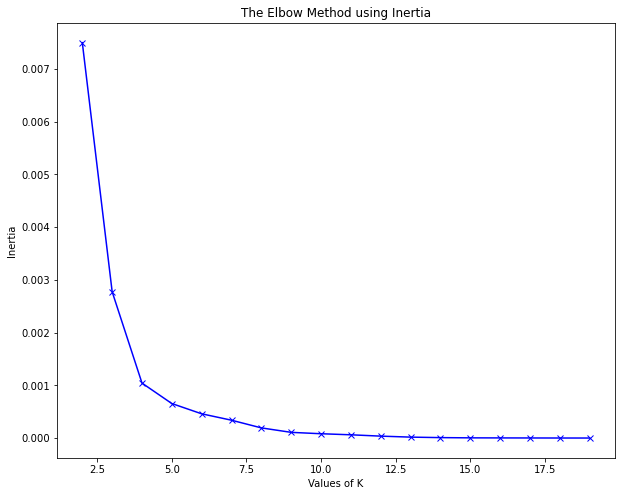

In [87]:
plt.figure(figsize=[10, 8])
inertia=[]
range_val=range(2,20)
for i in range_val:
  kmean=KMeans(n_clusters=i)
  kmean.fit_predict(X)
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [88]:
kclusters = 4

toronto_grouped_clustering = ita.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 1, 3, 0, 2, 0, 0], dtype=int32)

In [89]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [91]:
to_merged = ita.copy()


to_merged["Cluster Labels"] = kmeans.labels_

In [92]:
to_merged.head()


Neighborhood  Italian Restaurant  \
0                                        Agincourt            0.000000   
1                           Alderwood, Long Branch            0.000000   
2  Bathurst Manor, Wilson Heights, Downsview North            0.000000   
3                                  Bayview Village            0.000000   
4                Bedford Park, Lawrence Manor East            0.086957   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               1

In [93]:
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(2141, 9)


Neighborhood  Italian Restaurant  Cluster Labels  \
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
0               Agincourt                 0.0               0   
1  Alderwood, Long Branch                 0.0               0   
1  Alderwood, Long Branch                 0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
1              43.602414              -79.543484   
1              43.602414              -79.543484   

                              Venue  Venue Latitude  Venue Longitude  \
0       Panagio's Breakfast & Lunch       43.792370       -79.260203   
0                          Twilight       43.791999       -79.258584   
0                     El Pulgarcito       43.792648       -79.259208   
1  Il Paesano Pizzeria & Restaurant       43.601280       -79.545028   
1  Toronto Gymnastics International       43.599832       -79.542924   

              Venue Category  
0             Breakfast Spot  
0                     Lounge  
0  Latin American Restaurant  
1                Pizza Place  
1                        Gym

In [94]:
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.tail()

(2141, 9)


Neighborhood  Italian Restaurant  \
17                     Commerce Court, Victoria Hotel                0.02   
17                     Commerce Court, Victoria Hotel                0.02   
17                     Commerce Court, Victoria Hotel                0.02   
17                     Commerce Court, Victoria Hotel                0.02   
40  Harbourfront East, Union Station, Toronto Islands                0.02   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
17               3              43.648198              -79.379817   
17               3              43.648198              -79.379817   
17               3              43.648198              -79.379817   
17               3              43.648198              -79.379817   
40               3              43.640816              -79.381752   

                                        Venue  Venue Latitude  \
17                              Biff's Bistro       43.647085   
17  GoodLife Fitness Toronto 137 Yonge Street       43.651242   
17    Cosmopolitan Toronto Centre Hotel & Spa       43.649064   
17                               Indigospirit       43.648350   
40                                     Subway       43.639708   

    Venue Longitude     Venue Category  
17       -79.376342  French Restaurant  
17       -79.378068                Gym  
17       -79.377598              Hotel  
17       -79.380347          Bookstore  
40       -79.383441     Sandwich Place

In [95]:
to_merged['Venue Category'].value_counts()['Italian Restaurant']


40

In [96]:
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

# Neighbourhoods per cluster

In [97]:
ita["Cluster Labels"] = kmeans.labels_
ita.head()

Neighborhood  Italian Restaurant  \
0                                        Agincourt            0.000000   
1                           Alderwood, Long Branch            0.000000   
2  Bathurst Manor, Wilson Heights, Downsview North            0.000000   
3                                  Bayview Village            0.000000   
4                Bedford Park, Lawrence Manor East            0.086957   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               1

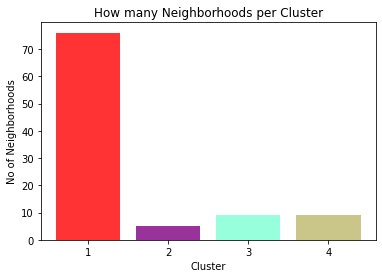

In [98]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

# Neighbourhoods in each cluster

In [99]:
ita['Cluster Labels'].value_counts()


0    76
3     9
2     9
1     5
Name: Cluster Labels, dtype: int64

# Cluster analysis

In [100]:
# cluster 1
df_new = df[['Borough', 'Neighborhood']]
df_new.head()

Borough                      Neighborhood
0        North York                         Parkwoods
1        North York                  Victoria Village
2  Downtown Toronto         Regent Park, Harbourfront
3        North York  Lawrence Manor, Lawrence Heights
4      Queen's Park     Ontario Provincial Government

In [101]:
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1.head()

Borough      Neighborhood  Italian Restaurant  Cluster Labels  \
0  North York         Parkwoods                 0.0               0   
1  North York         Parkwoods                 0.0               0   
2  North York         Parkwoods                 0.0               0   
3  North York  Victoria Village                 0.0               0   
4  North York  Victoria Village                 0.0               0   

   Neighborhood Latitude  Neighborhood Longitude                   Venue  \
0              43.753259              -79.329656           Variety Store   
1              43.753259              -79.329656                     KFC   
2              43.753259              -79.329656         Brookbanks Park   
3              43.725882              -79.315572  Victoria Village Arena   
4              43.725882              -79.315572             Tim Hortons   

   Venue Latitude  Venue Longitude        Venue Category  
0       43.751974       -79.333114     Food & Drink Shop  
1       43.754387       -79.333021  Fast Food Restaurant  
2       43.751976       -79.332140                  Park  
3       43.723481       -79.315635          Hockey Arena  
4       43.725517       -79.313103           Coffee Shop

In [102]:
# cluster 2
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
df_cluster2.head()

Borough Neighborhood  Italian Restaurant  Cluster Labels  \
0  Downtown Toronto     Christie              0.0625               1   
1  Downtown Toronto     Christie              0.0625               1   
2  Downtown Toronto     Christie              0.0625               1   
3  Downtown Toronto     Christie              0.0625               1   
4  Downtown Toronto     Christie              0.0625               1   

   Neighborhood Latitude  Neighborhood Longitude              Venue  \
0              43.669542              -79.422564  Stubbe Chocolates   
1              43.669542              -79.422564       Fiesta Farms   
2              43.669542              -79.422564        Contra Cafe   
3              43.669542              -79.422564     Vinny’s Panini   
4              43.669542              -79.422564            Loblaws   

   Venue Latitude  Venue Longitude      Venue Category  
0       43.671566       -79.421289         Candy Store  
1       43.668471       -79.420485       Grocery Store  
2       43.669107       -79.426105                Café  
3       43.670679       -79.426148  Italian Restaurant  
4       43.671657       -79.421364       Grocery Store

In [103]:
# cluster 3
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3.head()

Borough     Neighborhood  Italian Restaurant  Cluster Labels  \
0  North York  Don Mills South                0.05               2   
1  North York  Don Mills South                0.05               2   
2  North York  Don Mills South                0.05               2   
3  North York  Don Mills South                0.05               2   
4  North York  Don Mills South                0.05               2   

   Neighborhood Latitude  Neighborhood Longitude               Venue  \
0                43.7259              -79.340923  Sorento Restaurant   
1                43.7259              -79.340923  Fitness Connection   
2                43.7259              -79.340923         Pho 88 發發餐廳   
3                43.7259              -79.340923    Congee Star 帝王名粥   
4                43.7259              -79.340923       Delimark Cafe   

   Venue Latitude  Venue Longitude      Venue Category  
0       43.726575       -79.341989  Italian Restaurant  
1       43.727473       -79.341707                 Gym  
2       43.726642       -79.342345    Asian Restaurant  
3       43.726586       -79.341833  Chinese Restaurant  
4       43.727536       -79.339547         Coffee Shop

In [104]:
# cluster 4
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4.head()

Borough                   Neighborhood  Italian Restaurant  \
0  Queen's Park  Ontario Provincial Government            0.029412   
1  Queen's Park  Ontario Provincial Government            0.029412   
2  Queen's Park  Ontario Provincial Government            0.029412   
3  Queen's Park  Ontario Provincial Government            0.029412   
4  Queen's Park  Ontario Provincial Government            0.029412   

   Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0               3              43.662301              -79.389494   
1               3              43.662301              -79.389494   
2               3              43.662301              -79.389494   
3               3              43.662301              -79.389494   
4               3              43.662301              -79.389494   

                         Venue  Venue Latitude  Venue Longitude  \
0                         SUDS       43.659880       -79.394712   
1                  Tim Hortons       43.658906       -79.388696   
2  Understudy Café at Gerstein       43.662308       -79.394098   
3        Hart House Music Room       43.663758       -79.395027   
4        Second Cup Coffee Co.       43.659933       -79.391664   

      Venue Category  
0                Bar  
1        Coffee Shop  
2  College Cafeteria  
3        Music Venue  
4               Café

Text(0.5, 1.0, 'Average number of Italian Restaurants per Cluster')

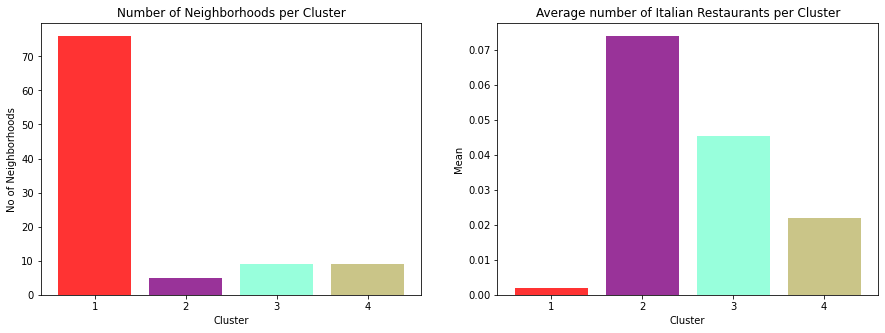

In [105]:
# Number of Italian restaurants in each cluster
plt.figure(figsize=(15,5))

# Plot-1 ( Number of Neighborhoods per Cluster )

plt.subplot(1,2,1)
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = ita['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf_1 = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf_1, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Number of Neighborhoods per Cluster')

# Plot-2 ( Average number of Italian Restaurants per Cluster )

plt.subplot(1, 2, 2)
clusters_mean = [df_cluster1['Italian Restaurant'].mean(),df_cluster2['Italian Restaurant'].mean(),df_cluster3['Italian Restaurant'].mean(),
                df_cluster4['Italian Restaurant'].mean()]
y_pos = np.arange(len(objects))
perf_2 = clusters_mean
plt.bar(y_pos, perf_2, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Italian Restaurants per Cluster')

# Conclusion 

In [ ]:
East Toronto neighbourhoods have the highest number of Italian restaurants and North York has the second highest numbwr of Italian restaurants.
The most viable area to open a new Italian restaurant is in the North of York as the area has an insignificant numebr of Italian restaurants and 
competition is not as high as in other neighbourhoods.
Another neighbourhood with great business potential is Queen`s Park with a number of 70 neighbourhoods in the area and no Italian restaurant in the area.
